In [1]:
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     

In [2]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
df = pd.read_csv(url)
df
     

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [4]:
df = df.drop(columns=['cabin'], axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder
cols = ['sex', 'embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,2
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [6]:
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mean())
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


In [7]:
df.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

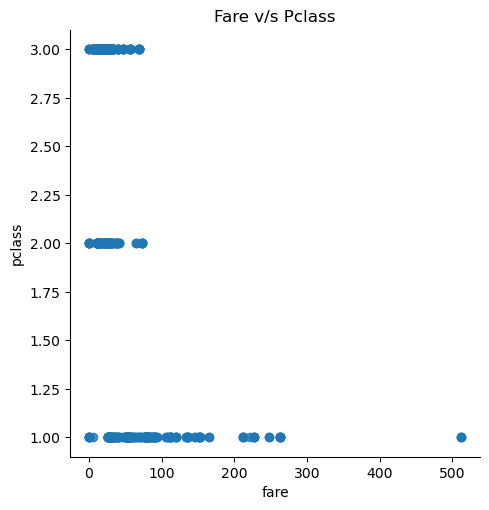

In [8]:
sns.lmplot(x ='fare', y ='pclass',fit_reg = False, data = df)
plt.title("Fare v/s Pclass")
plt.show()

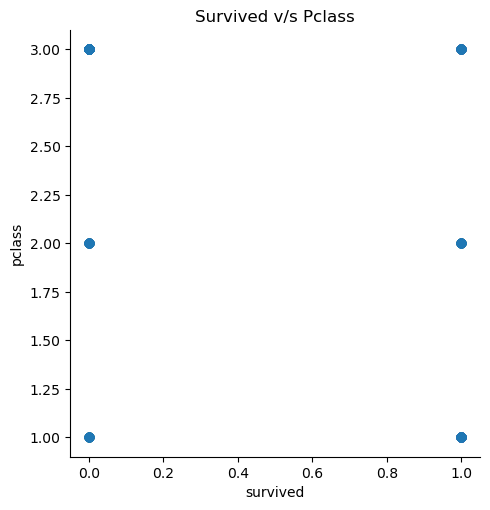

In [9]:
sns.lmplot(x ='survived', y ='pclass',fit_reg = False, data = df)
plt.title("Survived v/s Pclass")
plt.show()

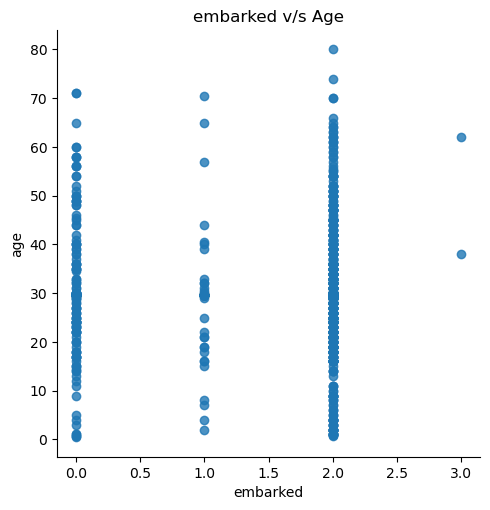

In [10]:
sns.lmplot(x ='embarked', y ='age',fit_reg = False, data = df)
plt.title("embarked v/s Age")
plt.show()

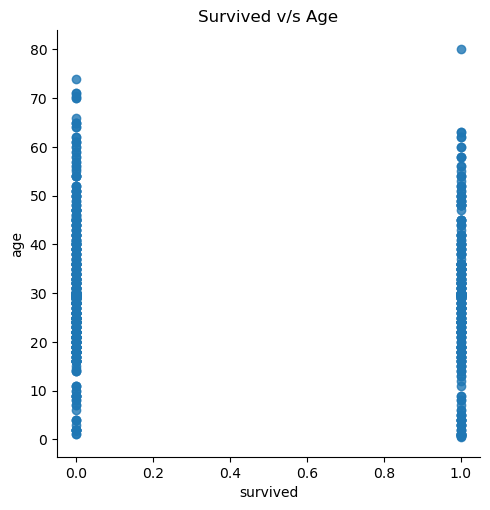

In [11]:
sns.lmplot(x ='survived', y ='age',fit_reg = False, data = df)
plt.title("Survived v/s Age")
plt.show()

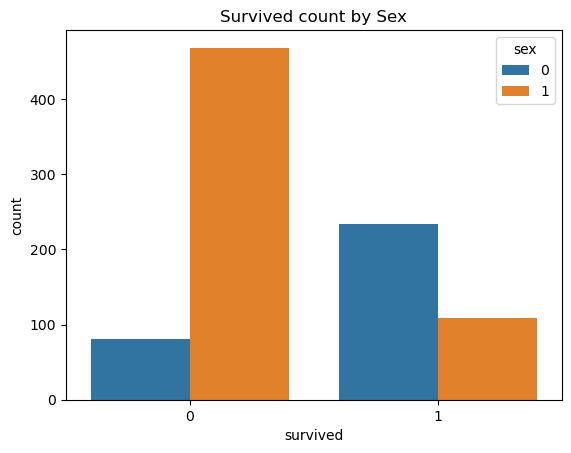

In [12]:
sns.countplot(x ='survived', hue = "sex", data = df)
plt.title("Survived count by Sex")
plt.show()

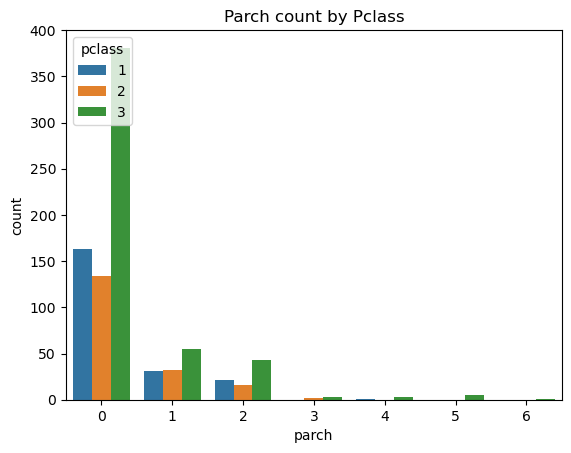

In [13]:
sns.countplot(x ='parch', hue = "pclass", data = df)
plt.title("Parch count by Pclass")
plt.show()

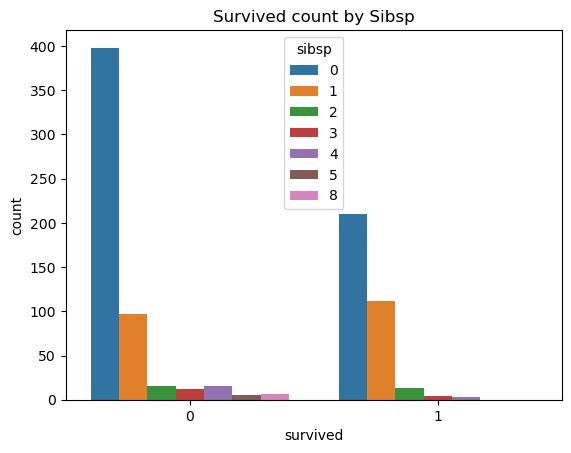

In [14]:
sns.countplot(x ='survived', hue = "sibsp", data = df)
plt.title("Survived count by Sibsp")
plt.show()

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


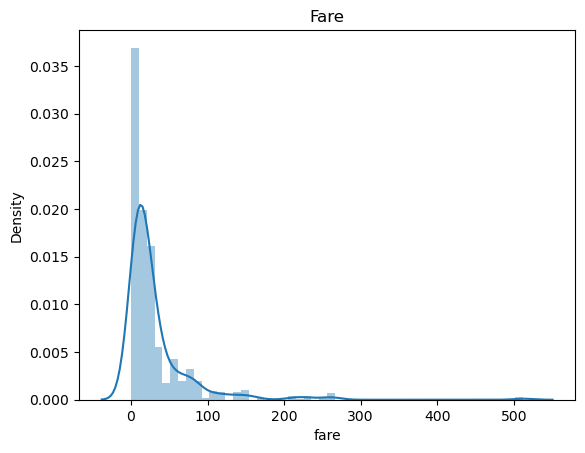

In [15]:
sns.distplot(df['fare'])
plt.title("Fare")
plt.show()

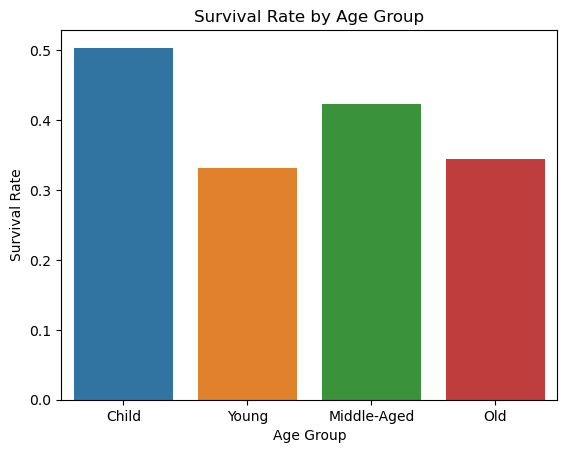

In [16]:
# Create a new column for age bands

# Create a new column 'age_group' to categorize passengers by age
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young', 'Middle-Aged', 'Old'])

# Calculate the survival rate for each age group
age_group_survival = df.groupby('age_group')['survived'].mean().reset_index()

# Create a bar plot of the survival rate by age group
sns.barplot(x='age_group', y='survived', data=age_group_survival)

# Set the title of the bar plot
plt.title('Survival Rate by Age Group')

# Set the x-axis label
plt.xlabel('Age Group')

# Set the y-axis label
plt.ylabel('Survival Rate')

# Show the plot
plt.show()


+895]=